In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


#data collection

In [2]:
movie=pd.read_csv('movies.csv')

In [3]:
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
movie.shape

(7668, 15)

In [5]:
movie.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#Preprocessing


#missing value handling

In [7]:
movie.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
movie['budget']=movie['budget'].fillna(movie['budget'].median())
movie['runtime']=movie['runtime'].fillna(movie['runtime'].median())
for i in ['rating','writer','star','country']:
    movie[i]=movie[i].fillna(movie[i].mode())


In [10]:
movie.isna().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       0
dtype: int64

In [11]:
movie_fs= movie.drop(['name','score','gross', 'votes'],axis=1)
movie_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7591 non-null   object 
 1   genre     7668 non-null   object 
 2   year      7668 non-null   int64  
 3   released  7666 non-null   object 
 4   director  7668 non-null   object 
 5   writer    7665 non-null   object 
 6   star      7667 non-null   object 
 7   country   7665 non-null   object 
 8   budget    7668 non-null   float64
 9   company   7651 non-null   object 
 10  runtime   7668 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 659.1+ KB


#EDA

#Univariate Analysis


(array([5.979e+03, 9.580e+02, 3.660e+02, 1.520e+02, 1.210e+02, 5.800e+01,
        1.400e+01, 1.500e+01, 3.000e+00, 2.000e+00]),
 array([3.000000e+03, 3.560270e+07, 7.120240e+07, 1.068021e+08,
        1.424018e+08, 1.780015e+08, 2.136012e+08, 2.492009e+08,
        2.848006e+08, 3.204003e+08, 3.560000e+08]),
 <BarContainer object of 10 artists>)

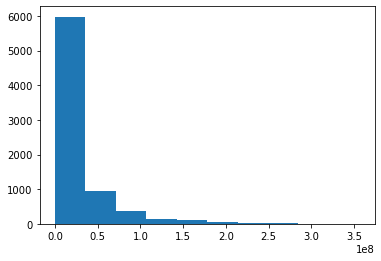

In [12]:
plt.hist(movie_fs['budget'])


<AxesSubplot:>

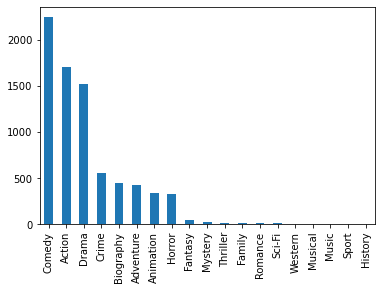

In [13]:
movie['genre'].value_counts().plot.bar()

#Bivariate Analysis

<AxesSubplot:>

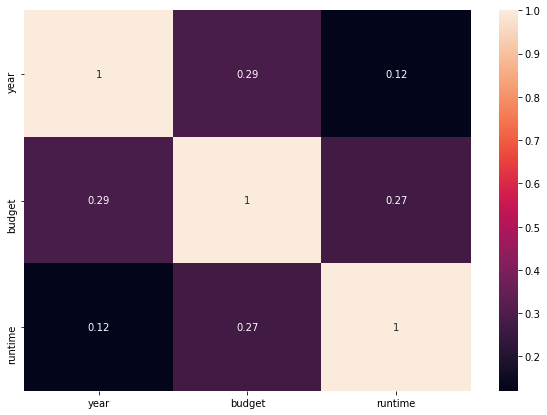

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(movie_fs.corr(),annot=True)

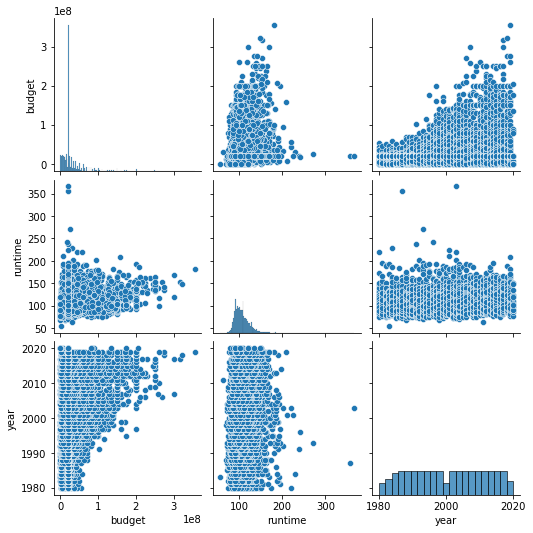

In [15]:
sns.pairplot(movie_fs[['budget','runtime','year']])

#outlier handling

<AxesSubplot:>

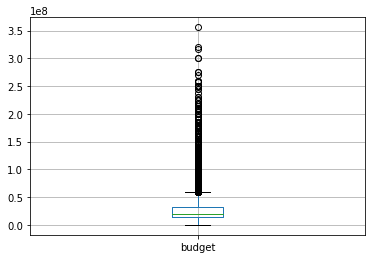

In [16]:
movie_fs.boxplot(['budget'])

In [17]:
q1=np.percentile(movie_fs['budget'],25,interpolation='midpoint')
q2=np.percentile(movie_fs['budget'],50,interpolation='midpoint')
q3=np.percentile(movie_fs['budget'],75,interpolation='midpoint')

In [18]:
print(q1,q2,q3)

14000000.0 20500000.0 32000000.0


In [19]:
iqr=q3-q1
#interquatile range
low_lim=q1-1.5*iqr
up_lim=q3+1.5*iqr
print(low_lim,up_lim)

-13000000.0 59000000.0


In [20]:
outlier=[]
for x in movie_fs['budget']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [21]:
outlier

[70000000.0,
 63000000.0,
 70000000.0,
 65000000.0,
 70000000.0,
 60000000.0,
 102000000.0,
 70000000.0,
 65000000.0,
 80000000.0,
 60000000.0,
 63000000.0,
 85000000.0,
 70000000.0,
 115000000.0,
 60000000.0,
 62000000.0,
 75000000.0,
 63000000.0,
 60000000.0,
 70000000.0,
 65897768.0,
 60000000.0,
 60000000.0,
 72000000.0,
 65000000.0,
 100000000.0,
 90000000.0,
 175000000.0,
 60000000.0,
 98000000.0,
 90000000.0,
 62000000.0,
 60000000.0,
 68000000.0,
 80000000.0,
 75000000.0,
 80000000.0,
 92000000.0,
 75000000.0,
 75000000.0,
 70000000.0,
 65000000.0,
 100000000.0,
 100000000.0,
 80000000.0,
 67000000.0,
 80000000.0,
 60000000.0,
 60000000.0,
 200000000.0,
 93000000.0,
 62000000.0,
 105000000.0,
 75000000.0,
 90000000.0,
 90000000.0,
 85000000.0,
 125000000.0,
 60000000.0,
 85000000.0,
 116000000.0,
 73000000.0,
 80000000.0,
 75000000.0,
 110000000.0,
 160000000.0,
 68000000.0,
 70000000.0,
 75000000.0,
 60000000.0,
 90000000.0,
 80000000.0,
 90000000.0,
 80000000.0,
 60000000.0,


In [22]:
len(outlier)

1008

In [23]:
ind2=movie_fs['budget']>up_lim
movie_fs.loc[ind2].index

Int64Index([1254, 1272, 1450, 1645, 1651, 1672, 1843, 1846, 1875, 2054,
            ...
            7545, 7560, 7568, 7643, 7645, 7648, 7649, 7650, 7651, 7652],
           dtype='int64', length=1008)

In [24]:
med=movie_fs.loc[movie_fs['budget']>59000000.0,'budget'].median()
movie_fs.loc[movie_fs['budget']>59000000.0,'budget']=np.nan
movie_fs.fillna(med,inplace=True)

<AxesSubplot:>

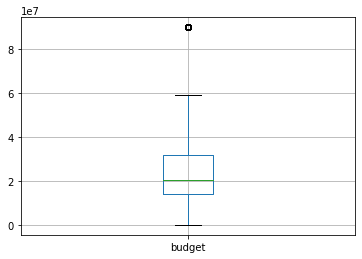

In [25]:
movie_fs.boxplot(['budget'])

<AxesSubplot:>

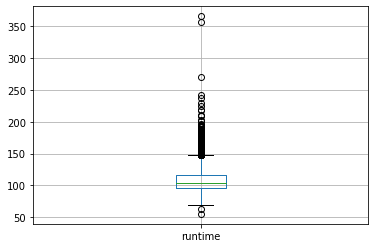

In [26]:
movie_fs.boxplot(['runtime'])

In [27]:
q1=np.percentile(movie_fs['runtime'],25,interpolation='midpoint')
q2=np.percentile(movie_fs['runtime'],50,interpolation='midpoint')
q3=np.percentile(movie_fs['runtime'],75,interpolation='midpoint')

In [28]:
iqr=q3-q1
#interquatile range
low_lim=q1-1.5*iqr
up_lim=q3+1.5*iqr
print(low_lim,up_lim)

63.5 147.5


In [29]:
outlier=[]
for x in movie_fs['runtime']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [30]:
ind2=movie_fs['runtime']>up_lim
movie_fs.loc[ind2].index

Int64Index([  21,   49,   66,  102,  115,  135,  159,  219,  220,  231,
            ...
            7559, 7575, 7585, 7590, 7612, 7613, 7634, 7643, 7644, 7652],
           dtype='int64', length=238)

In [31]:
len(outlier)

240

In [32]:
movie_fs['runtime'].loc['ind2']=movie_fs['runtime'].median()

In [33]:
med=movie_fs.loc[movie_fs['runtime']>147.5,'runtime'].median()
movie_fs.loc[movie_fs['runtime']>147.5,'runtime']=np.nan
movie_fs.fillna(med,inplace=True)

<AxesSubplot:>

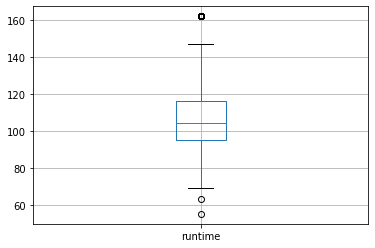

In [34]:
movie_fs.boxplot(['runtime'])

In [35]:
movie_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7668 non-null   object 
 1   genre     7668 non-null   object 
 2   year      7668 non-null   int64  
 3   released  7668 non-null   object 
 4   director  7668 non-null   object 
 5   writer    7668 non-null   object 
 6   star      7668 non-null   object 
 7   country   7668 non-null   object 
 8   budget    7668 non-null   float64
 9   company   7668 non-null   object 
 10  runtime   7668 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 659.1+ KB


In [36]:
 movie_fs.drop(['year','director','writer','star','country'],axis=1,inplace=True)
movie_fs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7668 non-null   object 
 1   genre     7668 non-null   object 
 2   released  7668 non-null   object 
 3   budget    7668 non-null   float64
 4   company   7668 non-null   object 
 5   runtime   7668 non-null   float64
dtypes: float64(2), object(4)
memory usage: 359.6+ KB


In [37]:
x=movie_fs.drop(['budget'],axis=1)
y=movie_fs['budget']

#Encoding

In [38]:
x.columns

Index(['rating', 'genre', 'released', 'company', 'runtime'], dtype='object')

In [39]:
company_dummies = pd.get_dummies(x['company'],drop_first=True)
x=pd.concat([x.drop('company',axis=1),company_dummies],axis=1)

In [40]:
genre_dummies = pd.get_dummies(x['genre'],drop_first=True)
x=pd.concat([x.drop('genre',axis=1),genre_dummies],axis=1)

In [41]:
rating_dummies = pd.get_dummies(x['rating'],drop_first=True)
x=pd.concat([x.drop('rating',axis=1),rating_dummies],axis=1)

In [42]:
month_dummies = pd.get_dummies(x['released'],drop_first=True)
x=pd.concat([x.drop('released',axis=1),month_dummies],axis=1)

In [43]:
x.head()

,runtime,"""DIA"" Productions GmbH & Co. KG","""Weathering With You"" Film Partners",.406 Production,1+2 Seisaku Iinkai,10 West Studios,120 Films,120dB Films,13 Productions,1492 Pictures,...,"September 9, 1983 (United States)","September 9, 1988 (United States)","September 9, 1993 (Australia)","September 9, 1994 (United States)","September 9, 2005 (United Kingdom)","September 9, 2005 (United States)","September 9, 2009 (United States)","September 9, 2011 (United States)","September 9, 2016 (United Kingdom)","September 9, 2016 (United States)"
0,146.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,104.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,124.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#scaling

In [44]:
stds = StandardScaler()
x=stds.fit_transform(x)

In [45]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,5820,5821,5822,5823,5824,5825,5826,5827,5828,5829
count,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,...,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03,7.668000e+03
mean,-2.137150e-15,3.549736e-16,-4.306960e-16,3.531239e-16,3.531239e-16,6.005315e-16,3.549736e-16,-1.682934e-15,3.549736e-16,-9.258745e-16,...,-2.501183e-16,2.682594e-15,6.283305e-16,1.492796e-15,-1.107495e-15,-1.129734e-15,6.691060e-16,2.270242e-15,-1.104246e-16,-6.525483e-17
std,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,...,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00
min,-2.998151e+00,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,-1.615216e-02,...,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.978356e-02,-1.615216e-02,-1.615216e-02,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.142056e-02
25%,-6.945270e-01,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,-1.615216e-02,...,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.978356e-02,-1.615216e-02,-1.615216e-02,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.142056e-02
50%,-1.762116e-01,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,-1.615216e-02,...,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.978356e-02,-1.615216e-02,-1.615216e-02,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.142056e-02
75%,5.148756e-01,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.142056e-02,-1.615216e-02,-1.142056e-02,-1.615216e-02,...,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.978356e-02,-1.615216e-02,-1.615216e-02,-1.142056e-02,-1.978356e-02,-1.142056e-02,-1.142056e-02
max,3.164043e+00,8.756141e+01,8.756141e+01,8.756141e+01,8.756141e+01,8.756141e+01,8.756141e+01,6.191123e+01,8.756141e+01,6.191123e+01,...,8.756141e+01,5.054701e+01,8.756141e+01,5.054701e+01,6.191123e+01,6.191123e+01,8.756141e+01,5.054701e+01,8.756141e+01,8.756141e+01


#Splitting data

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

#Modelling

#Linear Regression

In [49]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

In [50]:
print('MSE is: ',mean_squared_error(y_test,prediction))
print("R squared value is :",r2_score(y_test,prediction))

MSE is:  9.185822241622275e+43
R squared value is : -1.3906897186134432e+29


#random forest

In [52]:
r=RandomForestRegressor()
r.fit(x_train,y_train.values.ravel())
prediction=r.predict(x_test)


In [53]:
print('MSE is: ',mean_squared_error(y_test,prediction))
print("R squared value is :",r2_score(y_test,prediction))

MSE is:  405691252149024.4
R squared value is : 0.38580277469486224


#decision Tree

In [55]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train.values.ravel()) 
prediction=model.predict(x_test)


In [56]:
print('MSE is: ',mean_squared_error(y_test,prediction))
print("R squared value is :",r2_score(y_test,prediction))

MSE is:  597622937498343.8
R squared value is : 0.09522734827085855
